# Mount to google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Get the file

In [2]:
root_dir = '/content/drive/My Drive/5502DataMining/'
base_dir = root_dir + 'Data Mining/Project/'
file = base_dir + 'cleandata_sales.xlsx'

# Import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare the data

In [4]:
# read files
without_0_weeksale = pd.read_excel(file, sheet_name = 'without2013')

# Scatter

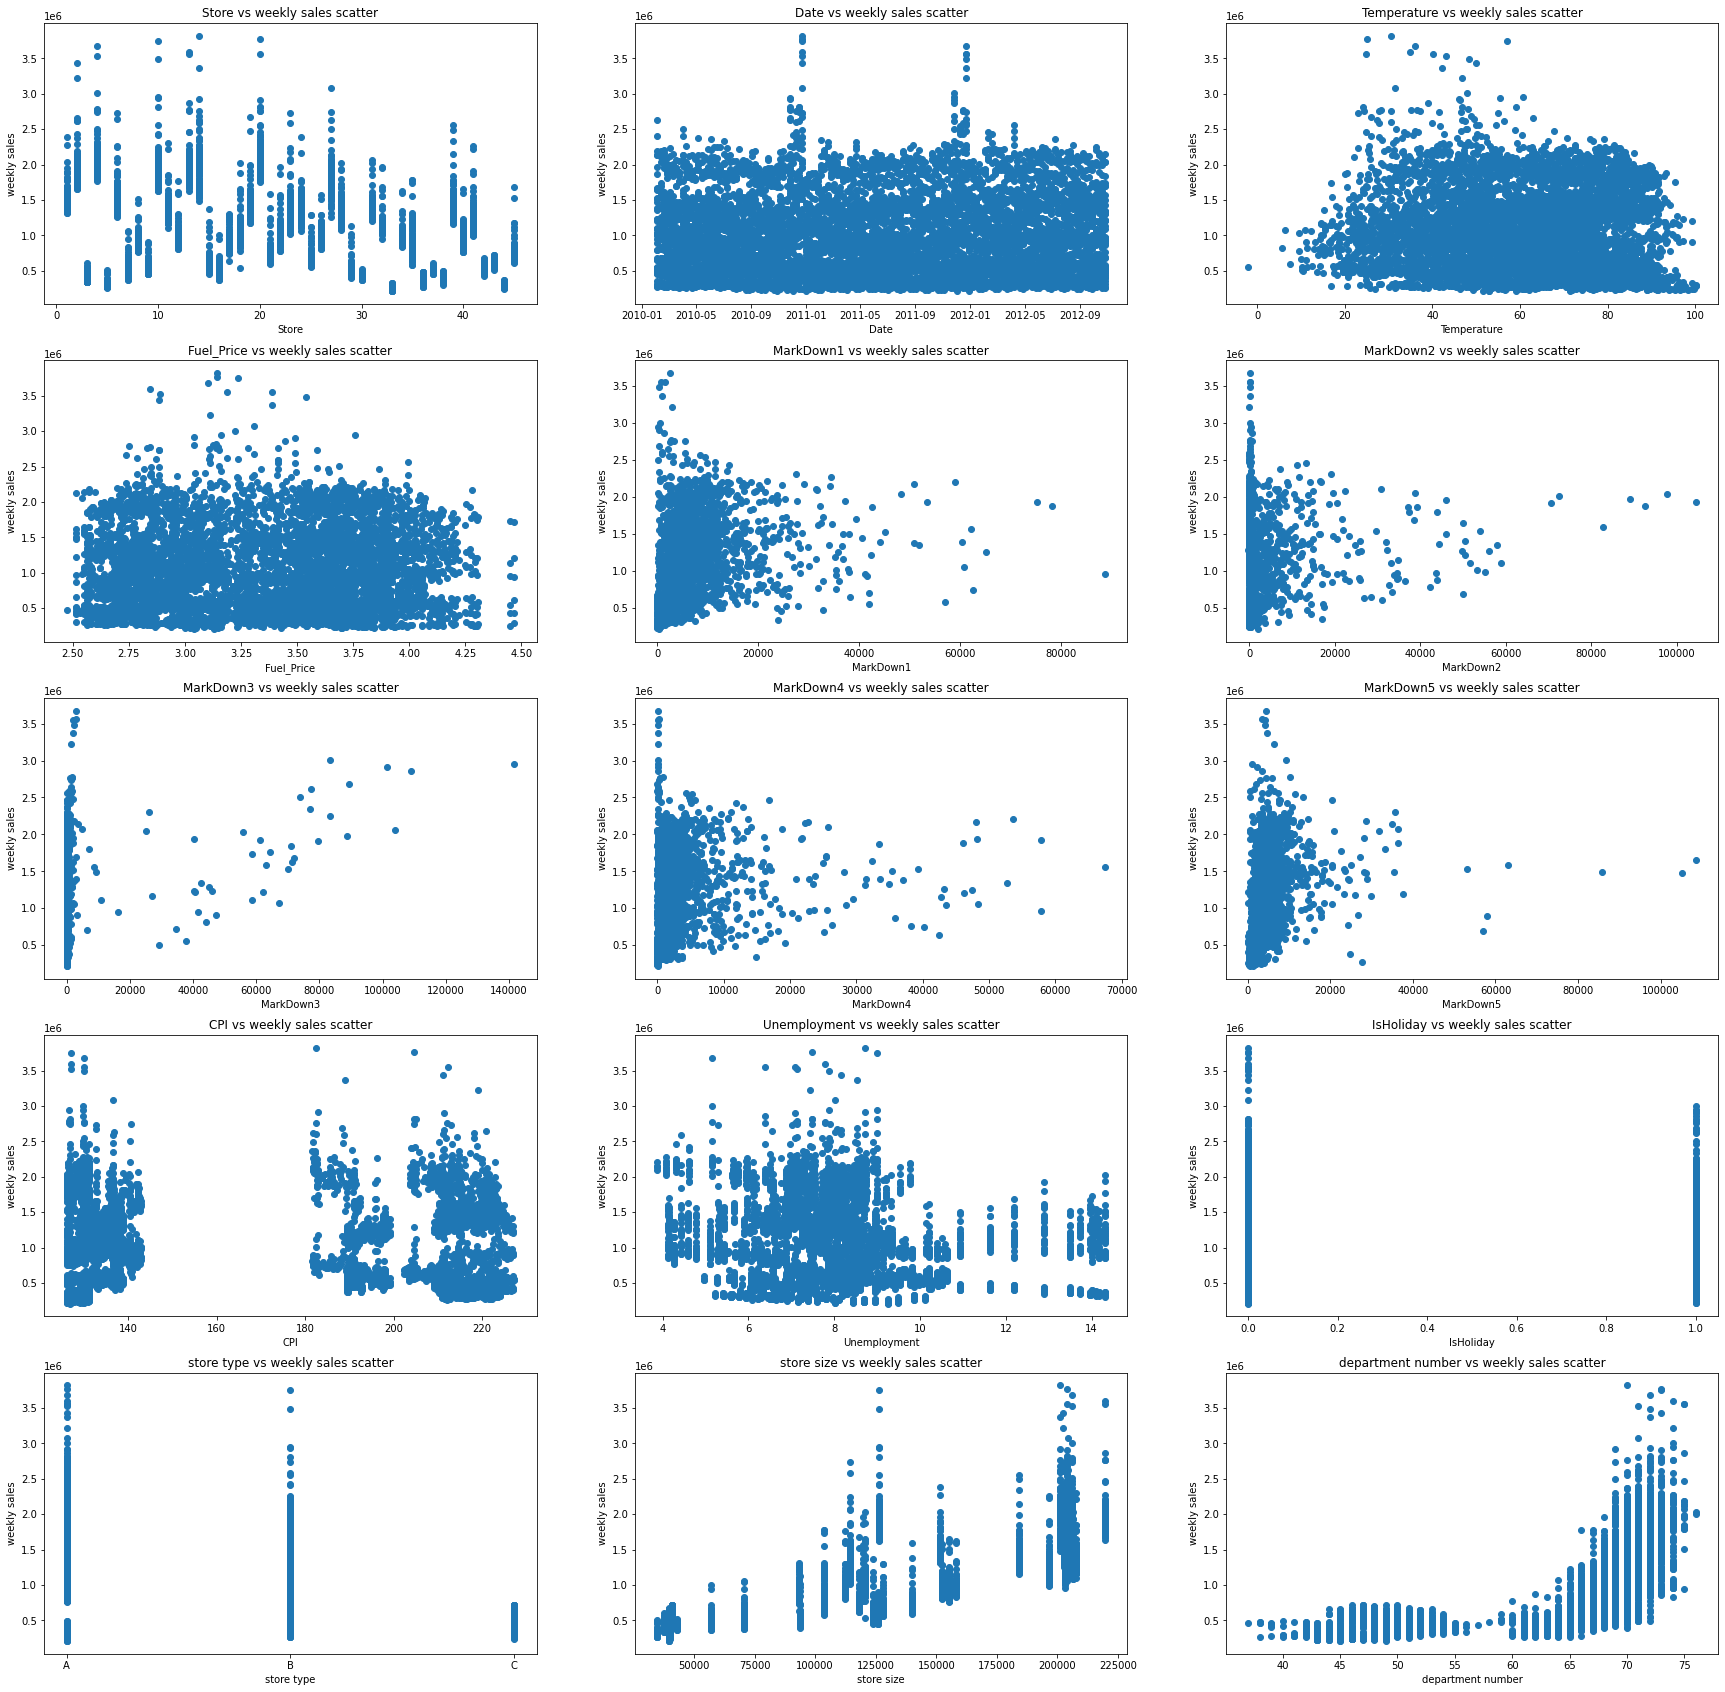

In [5]:
header = without_0_weeksale.columns
len_header = len(header)
# x = data[header[0]]
fig=plt.figure(figsize=(30,30))
y = without_0_weeksale[header[-1]]
for i in range(len_header - 1):
  x = without_0_weeksale[header[i]]
  fig.add_subplot(5,3, i+1)
  plt.scatter(x,y)  
  plt.xlabel(header[i])  
  plt.ylabel('weekly sales')    
  plt.title(str(header[i]+' vs weekly sales scatter'))

  # store numner vs weekly sales

# histogram

In [6]:
def histogram(data, x_label, y_label, title):
    '''Input : data is the list containing the data points for histogram buckets
    xlabel and ylabel are the labels that should be given to the corresponding axes
    title contains the title of the graph
    
    Output : A histogram displayed'''
    plt.hist(data, edgecolor='black',density=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

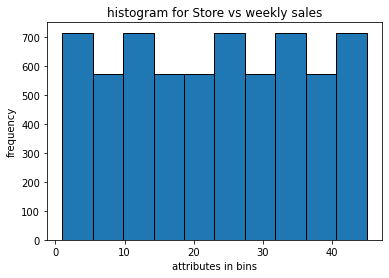

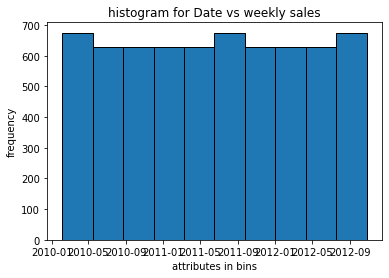

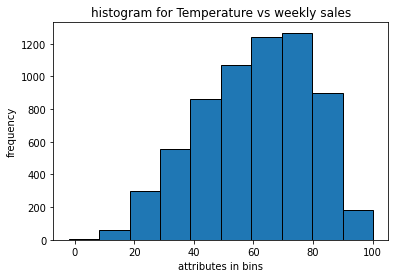

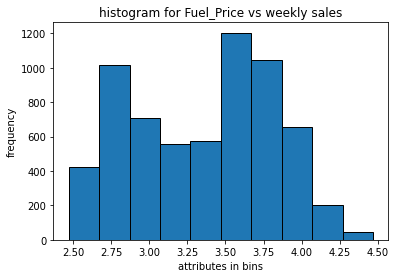

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


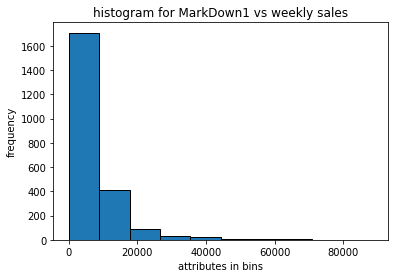

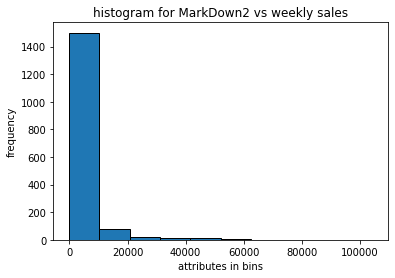

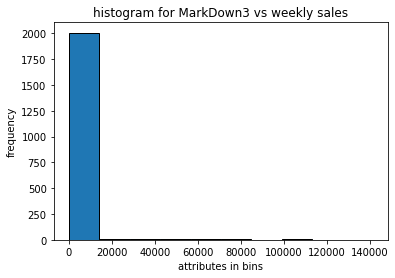

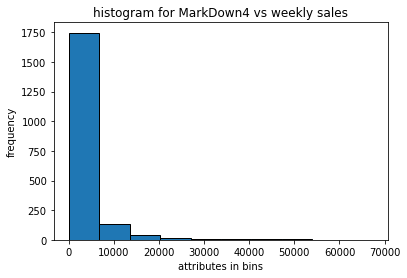

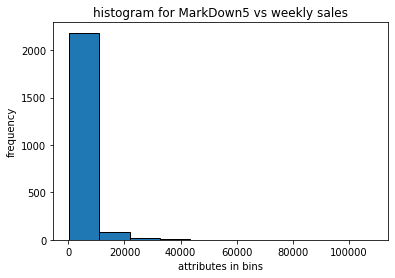

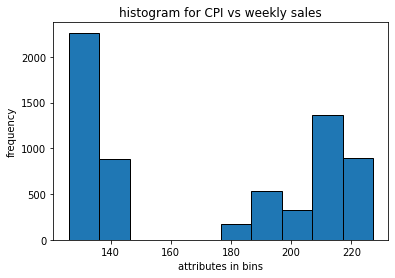

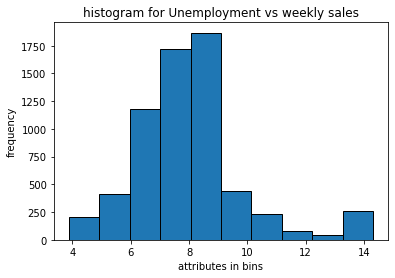

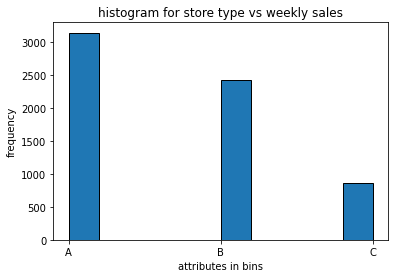

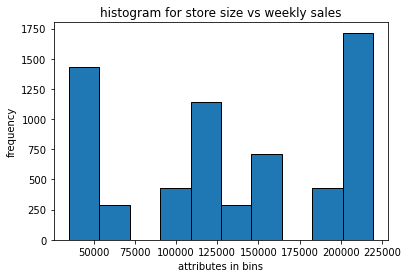

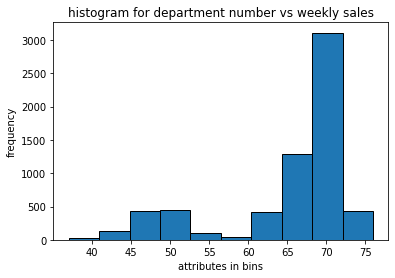

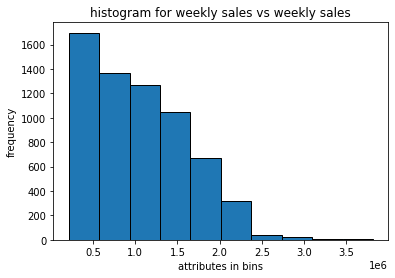

In [7]:
for i in range(len_header):
  if i != 11:
      histogram(without_0_weeksale[header[i]], 'attributes in bins', 'frequency', 'histogram for '+ str(header[i])+' vs weekly sales')


# heatmap

## readfile

In [9]:
base_dir = root_dir + 'Data Mining/Project/'
train_file = base_dir + 'Store Sales data/train.csv'
stores_file = base_dir + 'Store Sales data/stores.csv'
features_file = base_dir + 'Store Sales data/features.csv'
test_file = base_dir + 'Store Sales data/test.csv'
# read files
train_dataframe = pd.read_csv(train_file)
stores_dataframe = pd.read_csv(stores_file)
features_dataframe = pd.read_csv(features_file)
test_dataframe = pd.read_csv(test_file)
features_dataframe = features_dataframe.drop(columns='IsHoliday')

# join other tables
train_dataframe = pd.merge(train_dataframe, stores_dataframe, how='left', left_on='Store', right_on='Store')
train_dataframe = pd.merge(train_dataframe, features_dataframe,  how='left', left_on=['Store','Date'], right_on = ['Store','Date']) 


# convert date to week number
train_dataframe['Date'] = pd.to_datetime(train_dataframe['Date'], errors='coerce')
train_dataframe['Week_Number'] = train_dataframe['Date'].dt.week
test_dataframe['Date'] = pd.to_datetime(test_dataframe['Date'], errors='coerce')
test_dataframe['Week_Number'] = test_dataframe['Date'].dt.week

# convert a single column of boolean values to a column of integers 1 or 0
train_dataframe['IsHoliday'] = train_dataframe['IsHoliday'].astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


## plot heatmap

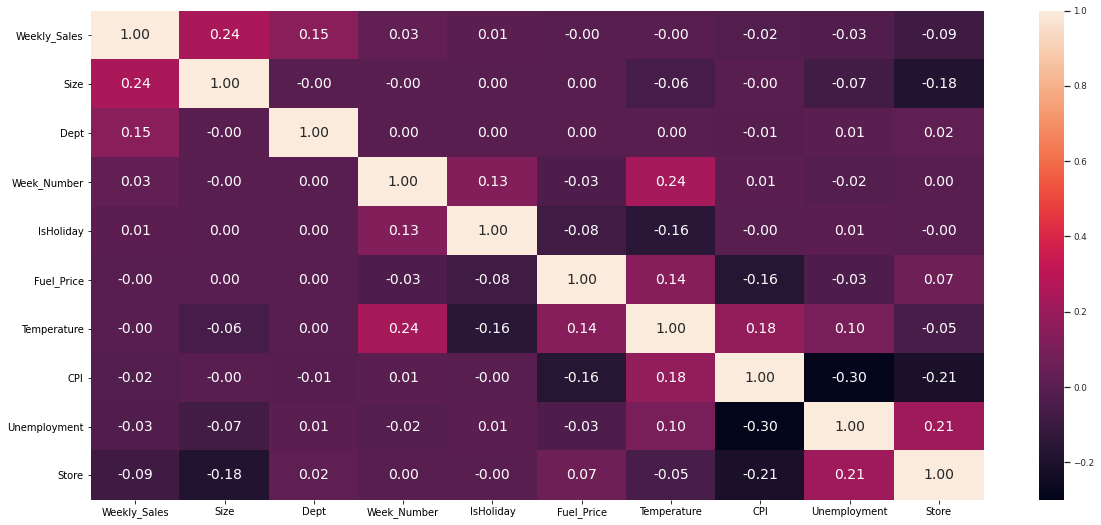

In [10]:
import seaborn as sns 

plot_data=train_dataframe.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4','MarkDown5'])
k  = 14 # 
corrmat = plot_data.corr()
f, ax = plt.subplots(figsize=(20, 9))
cols = corrmat.nlargest(k, 'Weekly_Sales')['Weekly_Sales'].index
cm = np.corrcoef(plot_data[cols].values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 14}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# pairplot

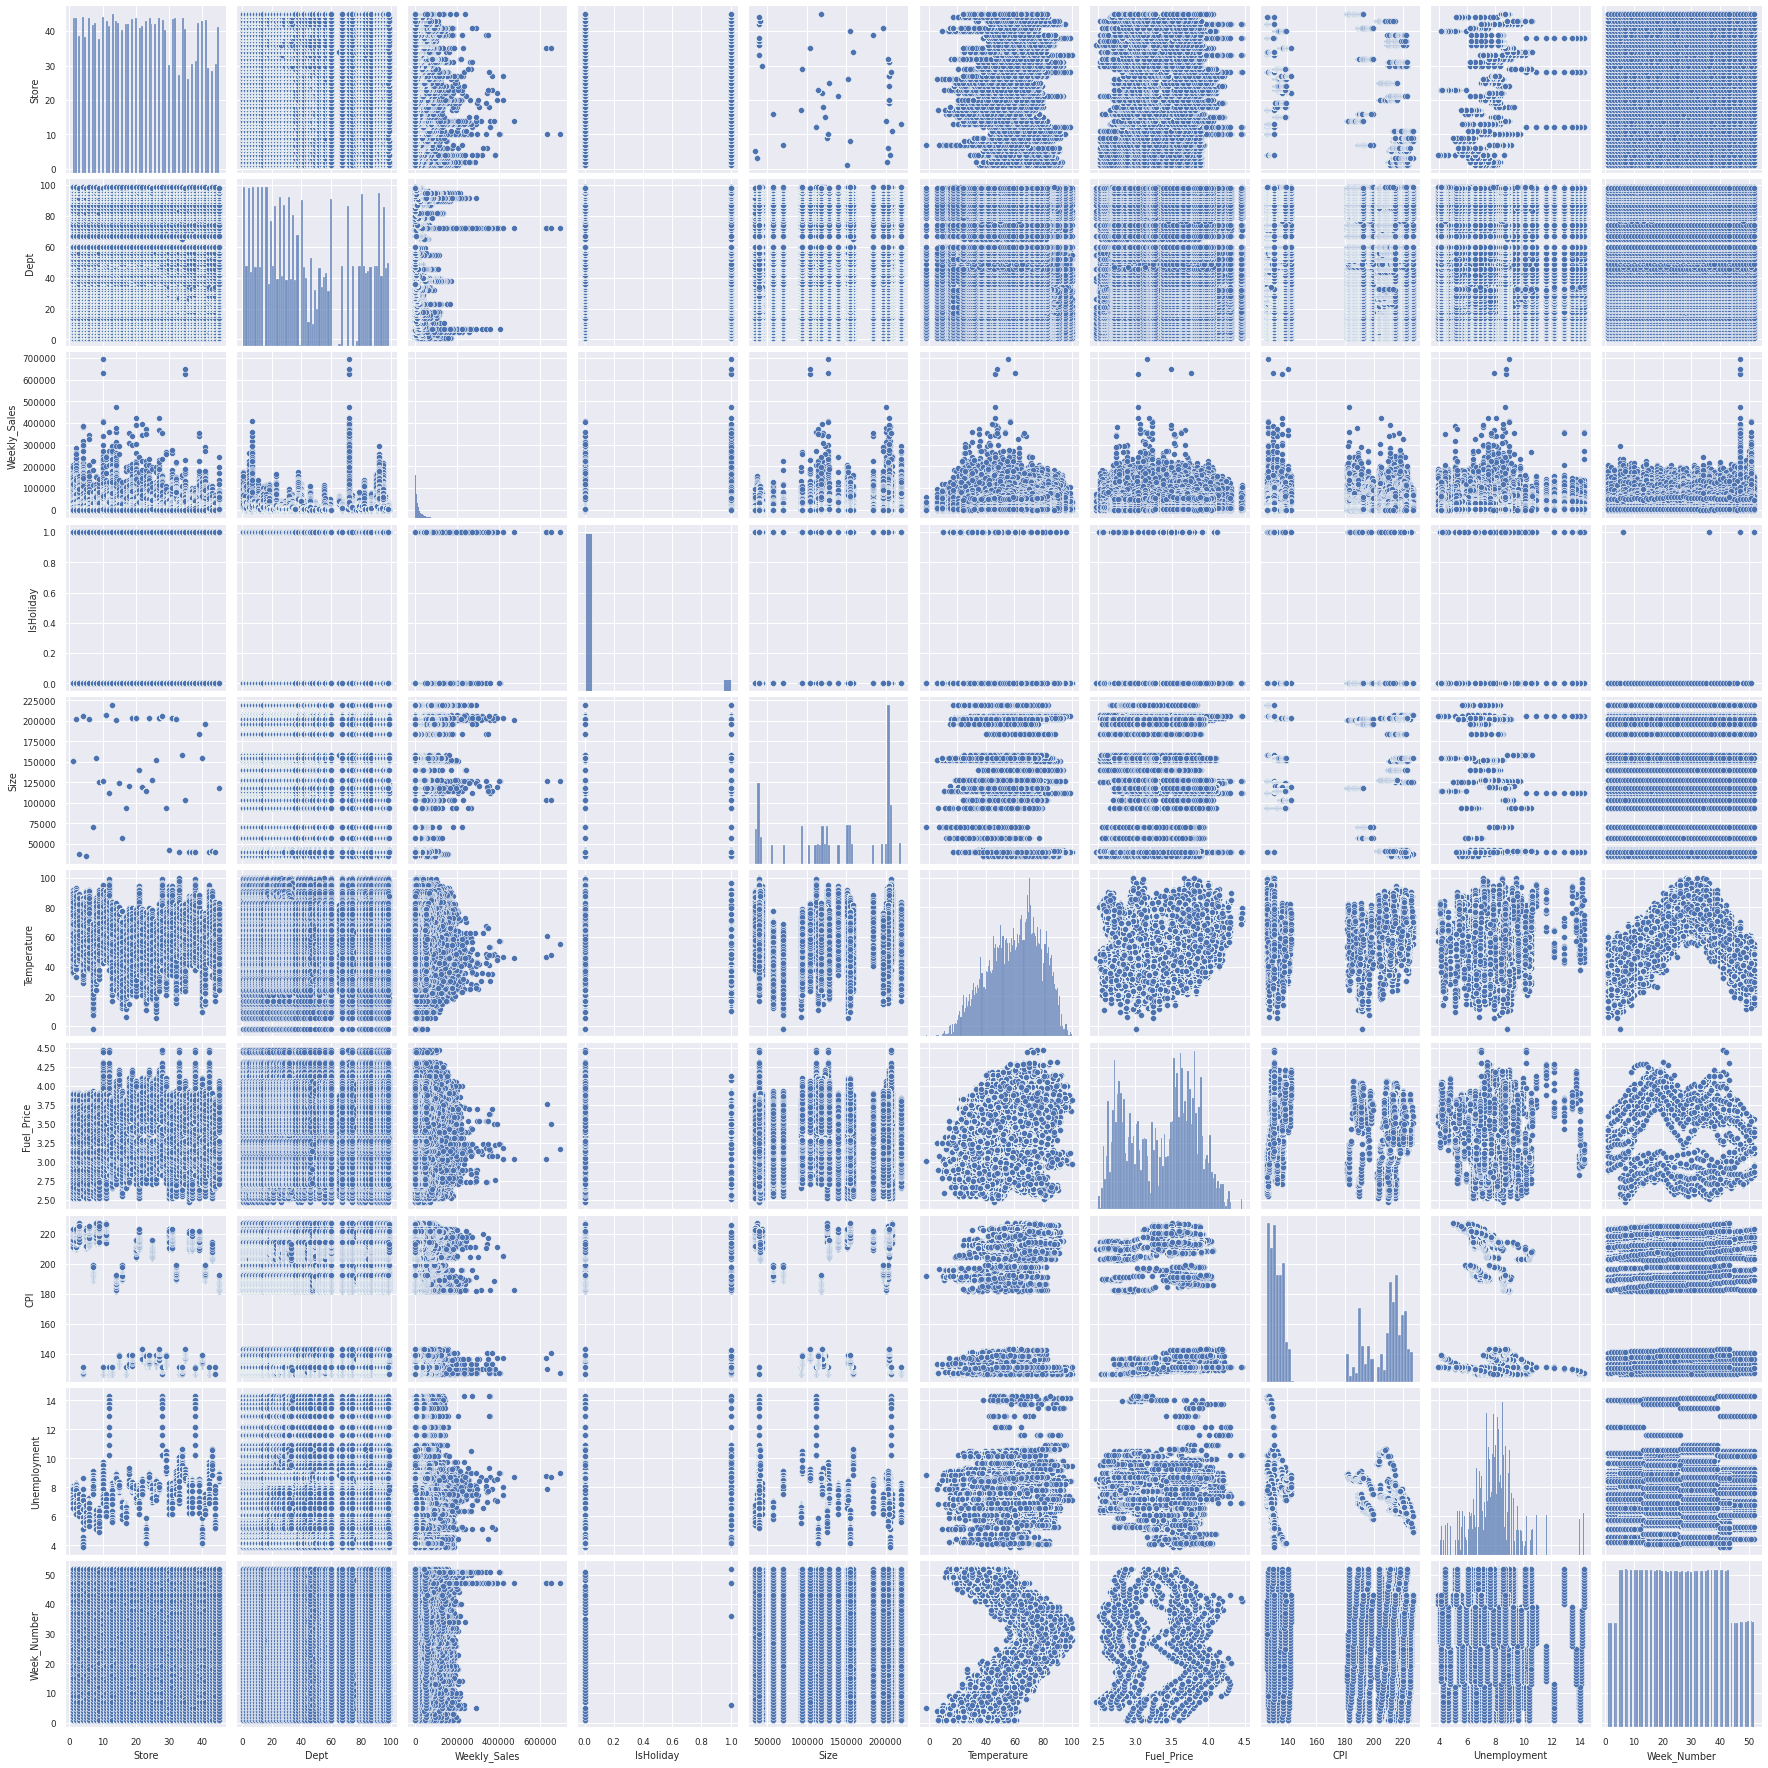

In [11]:
sns.pairplot(plot_data)